# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [30]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [58]:
file_path = '../train_cleaned.csv'
df = pd.read_csv(file_path)

df.head()

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,Auto Loan,...,Unknown,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,Auto Loan,...,Good,809.98,31.944960,268.5,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,Auto Loan,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,Auto Loan,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,Auto Loan,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [32]:
# Menghapus fitur yang tidak digunakan
df = df.drop(columns=['Customer_ID', 'Month', 'Occupation', 'Type_of_Loan', 'Credit_Utilization_Ratio'], axis=1)
df.head()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Unknown,809.98,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,1824.843333,3.0,4.0,3.0,4.0,0.0,6.0,11.27,4.0,Good,809.98,268.5,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,6.0,11.27,4.0,Good,809.98,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [33]:
# Membagi data menjadi train dan testing
train_df, test_df = train_test_split(df, test_size=0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
 
print(train_df.shape)
print(test_df.shape)

(95000, 19)
(5000, 19)


In [34]:
# Meninjau sebaran target
train_df.Credit_Score.value_counts()

Credit_Score
Standard    50525
Poor        27539
Good        16936
Name: count, dtype: int64

Karena dataset menunjukkan sebaran yang tidak seimbang (imbalance) maka perlu menyesuaikan agar seimbang.

In [35]:
df_majority_1 = train_df[(train_df.Credit_Score == "Standard")]
df_majority_2 = train_df[(train_df.Credit_Score == "Poor")]
df_minority = train_df[(train_df.Credit_Score == "Good")]

df_majority_1_undersampled = resample(df_majority_1, n_samples=16936, random_state=42)
df_majority_2_undersampled = resample(df_majority_2, n_samples=16936, random_state=42)
print(df_majority_1_undersampled.shape)
print(df_majority_2_undersampled.shape)

(16936, 19)
(16936, 19)


Pada kasus ini, saya menggunakan undersampling karena dataset sudah cukup banyak untuk kategori submission (Di atas 2500)

In [36]:
undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6571,37.0,1784.876667,6.0,9.0,16.0,9.0,55.0,13.0,22.73,14.0,Unknown,4432.96,136.0,Yes,126.491489,165.445969,Low_spent_Small_value_payments,176.550209,Poor
6280,32.0,1720.386667,6.0,5.0,5.0,7.0,20.0,14.0,16.89,7.0,Standard,289.05,221.0,Yes,72.581554,62.880197,Low_spent_Large_value_payments,306.576915,Standard
46447,38.0,5403.580000,2.0,1.0,12.0,0.0,3.0,7.0,11.82,2.0,Good,341.02,314.0,No,411.917836,149.591209,Unknown,640.766791,Good
2898,22.0,1694.845833,7.0,6.0,8.0,4.0,9.0,14.0,10.60,0.0,Standard,1393.23,206.0,No,61.449262,69.596433,Low_spent_Small_value_payments,328.438889,Standard
9189,45.0,2266.646667,3.0,10.0,15.0,7.0,13.0,20.0,11.50,9.0,Standard,1962.25,92.0,Yes,116.720193,165.789022,Low_spent_Small_value_payments,234.155452,Poor


Selanjutnya, bagi dataset menjadi data train dan testing berdasarkan data yang sudah seimbang

In [37]:
X_train = undersampled_train_df.drop(columns="Credit_Score", axis=1)
y_train = undersampled_train_df["Credit_Score"]
 
X_test = test_df.drop(columns="Credit_Score", axis=1)
y_test = test_df["Credit_Score"]

Pada kasus ini, dataset numerikal memiliki rentang yang berbeda-beda. Oleh karena itu, kit adapat melakukan scaling agar memiliki rentang distribusi yang sama.

In [38]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
            
            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

Agar mempermudah proses scaling, saya tentukan terlebih dahulu fitur numerikal

In [39]:
numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age'
]

Ubah data train dan testing menggunakan fungsi scaling yang sudah dibuat. 

In [40]:
new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)

Selanjutnya, kita perlu mengelola data kategorikal karena algoritma tidak dapat menerima data selain numerikal secara cuma-cuma.

In [41]:
def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
            
            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

Tentukan fitur kategorikal

In [42]:
categorical_columns = [
    'Credit_Mix',
    'Payment_of_Min_Amount', 
    'Payment_Behaviour'
]

Encode seluruh fitur kategorikal yang akan digunakan.

In [43]:
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

Encode seluruh fitur Target.

In [44]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")
 
new_y_test = encoder.transform(y_test)

Karena fitur yang digunakan pada kasus ini terlalu banyak, maka saya memutuskan untuk menggunakan PCA untuk mengurangi jumlah fitur.

In [45]:
pca_numerical_columns_1 = [
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_History_Age'
]
 
pca_numerical_columns_2 = [
    'Monthly_Inhand_Salary',
    'Monthly_Balance', 
    'Amount_invested_monthly', 
    'Total_EMI_per_month'
]

Melakukan proses PCA

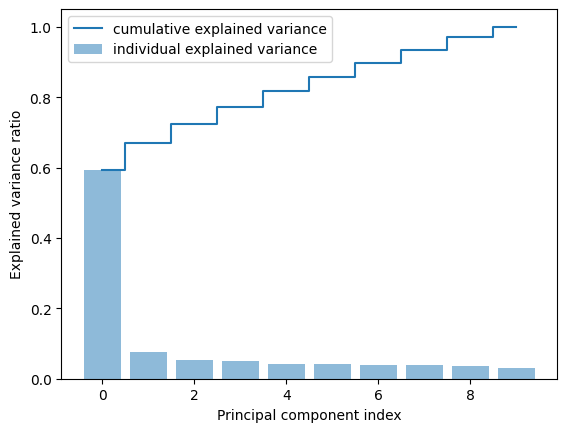

In [46]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)
 
pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])
 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)
 
plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [47]:
pca_1 = PCA(n_components=5, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Age,Monthly_Inhand_Salary,Credit_Mix,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,0.690476,0.237662,2,2,0.113024,0.025093,0,0.266400,0.216025,0.335070,0.056151,0.047829,0.146897
1,0.190476,0.503576,1,1,0.111900,0.080054,0,0.451454,-0.319038,0.112770,0.227198,0.055694,0.117256
2,0.428571,0.090128,1,1,0.033189,0.021363,3,0.221049,-0.419239,0.069822,0.232682,-0.110793,0.251450
3,0.476190,0.126136,1,0,0.060780,0.020599,0,0.212522,-0.257237,-0.237483,0.376886,-0.068433,0.012728
4,0.452381,0.104396,1,1,0.050268,0.082627,5,0.155497,-0.502552,0.073821,0.226193,-0.284319,-0.015748


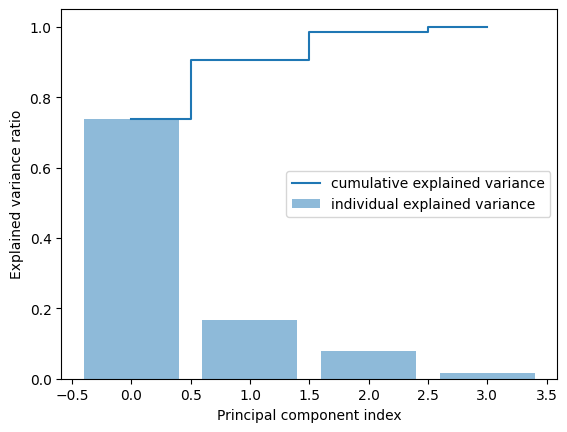

In [48]:
pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_2])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])
 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)
 
plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [49]:
pca_2 = PCA(n_components=2, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_columns_2])
joblib.dump(pca_2, "model/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

,Age,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0.690476,2,2,0,0.216025,0.335070,0.056151,0.047829,0.146897,-0.041306,0.042562
1,0.190476,1,1,0,-0.319038,0.112770,0.227198,0.055694,0.117256,0.278801,0.108811
2,0.428571,1,1,3,-0.419239,0.069822,0.232682,-0.110793,0.251450,-0.200276,0.056651
3,0.476190,1,0,0,-0.257237,-0.237483,0.376886,-0.068433,0.012728,-0.168980,0.037451
4,0.452381,1,1,5,-0.502552,0.073821,0.226193,-0.284319,-0.015748,-0.198335,-0.034793


In [50]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns_1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
 
test_princ_comp_1 = pca_2.transform(test_pca_df[pca_numerical_columns_2])
test_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(test_princ_comp_1, columns=["pc2_1", "pc2_2"])
test_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
test_pca_df.head()

,Age,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0.380952,1,1,0,-0.587922,0.065786,-0.240490,-0.074353,0.171067,-0.029663,0.141605
1,0.095238,0,2,5,0.758476,0.284881,-0.112092,0.249101,0.199763,-0.239913,-0.016609
2,0.642857,1,1,5,-0.441061,0.204324,-0.141343,0.030958,-0.200884,0.627842,-0.212269
3,0.500000,2,2,5,0.360298,-0.117948,-0.383579,-0.236151,-0.239712,-0.196669,0.059439
4,0.309524,1,1,1,-0.504467,0.468771,-0.080085,-0.094233,-0.195185,0.255679,0.112985


In [52]:
train_pca_df

,Age,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0.690476,2,2,0,0.216025,0.335070,0.056151,0.047829,0.146897,-0.041306,0.042562
1,0.190476,1,1,0,-0.319038,0.112770,0.227198,0.055694,0.117256,0.278801,0.108811
2,0.428571,1,1,3,-0.419239,0.069822,0.232682,-0.110793,0.251450,-0.200276,0.056651
3,0.476190,1,0,0,-0.257237,-0.237483,0.376886,-0.068433,0.012728,-0.168980,0.037451
4,0.452381,1,1,5,-0.502552,0.073821,0.226193,-0.284319,-0.015748,-0.198335,-0.034793
...,...,...,...,...,...,...,...,...,...,...,...
50803,0.809524,3,1,5,-0.635576,0.145799,-0.246169,-0.090937,0.304226,0.257879,-0.116892
50804,0.690476,2,2,1,0.280852,0.217853,0.026765,0.361747,0.315457,0.126756,-0.022089
50805,0.238095,0,2,2,0.533443,-0.146908,-0.171717,-0.112556,0.044141,-0.045215,-0.026265
50806,0.738095,1,1,3,-0.580120,-0.160754,0.230017,-0.061959,0.207276,-0.122196,-0.077088


In [55]:
combined_df = pd.concat([train_pca_df, pd.Series(new_y_train, name='Credit_Score')], axis=1)
combined_df.to_csv("train_pca.csv", index=False)

In [57]:
combined_df_train = pd.concat([test_pca_df, pd.Series(new_y_test, name='Credit_Score')], axis=1)
combined_df_train.to_csv("test_pca.csv", index=False)